## Import dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"/kaggle/input/amazon-product-data/dataset/train.csv")
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


### Column Types

- **Numerical** - PRODUCT_ID,PRODUCT_LENGTH
- **Categorical** - PRODUCT_TYPE_ID
- **NLP** - TITLE, BULLET_POINTS, DESCRIPTION

### Issues with the dataset

No unique indentification key

1. Dirty Data

  Table - `train`

  - missing data in bullet points and description
  - starting product id use diffrent language and have majorty value missing\
  - data contian emojis.
    1. title
        - special character/code in title -> "3NHÂ®"(2857066)
    
    2. bullet points
        - random integer value in bullet point -> product_id(2234464)
      
    3. description
        - description contain html tags.
        - random entry in descripition -> product_id(1195350)
        - duplicate description for some product like "as per".

2. Messy Data

  Table - `train`
  
  - some rows seems to use someother language or encoding.
    1. title
        - "," , "/" , "|" , "||" is use to seprate data in title.
        - no of items in title by "pcs" 
        - () value in title contain special values like no. of product or product size.
      
    2. BULLET_POINTS
        - BULLET_POINTS is given in form of list.
        - BULLET_POINTS itself contain subcategories like "LUXURIOUS & APPEALING","MATERIAL" identified with ":" or ":-" or "||"
    
    
    

### Automatic Assessment

- head and tail
- sample
- info
- isnull
- duplicated
- describe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [5]:
df.shape

(2249698, 6)

In [6]:
print("no of unique value:",df['PRODUCT_TYPE_ID'].nunique())
print("percent of unique value:",df['PRODUCT_TYPE_ID'].nunique()/df.shape[0])

no of unique value: 12907
percent of unique value: 0.005737214506124822


In [7]:
df['PRODUCT_ID'].nunique()

2249698

In [8]:
print("no. of null values :",(df['TITLE'].isnull()).sum())
print("percent of null values :",(df['TITLE'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['TITLE'].duplicated().sum())
print("percent  of duplicate values :",df['TITLE'].duplicated().sum()/df.shape[0])

no. of null values : 12
percent of null values : 5.334049281281309e-06
no. of duplicate values : 38935
percent  of duplicate values : 0.017306767397223984


In [9]:
print("no. of null values :",(df['BULLET_POINTS'].isnull()).sum())
print("percent of null values :",(df['BULLET_POINTS'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['BULLET_POINTS'].duplicated().sum()-df['BULLET_POINTS'].isnull().sum())
print("percent  of duplicate values :",(df['BULLET_POINTS'].duplicated().sum()-df['BULLET_POINTS'].isnull().sum())/df.shape[0])


no. of null values : 837364
percent of null values : 0.37221173686423686
no. of duplicate values : 447003
percent  of duplicate values : 0.1986946692400491


In [10]:
print("no. of null values :",(df['DESCRIPTION'].isnull()).sum())
print("percent of null values :",(df['DESCRIPTION'].isnull()).sum()/df.shape[0])
print("no. of duplicate values :",df['DESCRIPTION'].duplicated().sum()-df['DESCRIPTION'].isnull().sum())
print("percent  of duplicate values :",(df['DESCRIPTION'].duplicated().sum()-df['DESCRIPTION'].isnull().sum())/df.shape[0])

no. of null values : 1157381
percent of null values : 0.5144606076015537
no. of duplicate values : 347041
percent  of duplicate values : 0.15426114971876226


In [11]:
if(df.duplicated().sum()):
    print("no of duplicates are :",df.duplicated().sum())
else:
    print("dataset dont have any duplicate")

dataset dont have any duplicate


In [12]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [13]:
df['PRODUCT_LENGTH'].min(),df['PRODUCT_LENGTH'].max()

(1.0, 1885801400.0)

In [14]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
PRODUCT_ID,1.000000,0.250576,0.000424
PRODUCT_TYPE_ID,0.250576,1.000000,0.000961
PRODUCT_LENGTH,0.000424,0.000961,1.000000


In [15]:
grp=df.groupby('PRODUCT_TYPE_ID')

<AxesSubplot: xlabel='PRODUCT_TYPE_ID'>

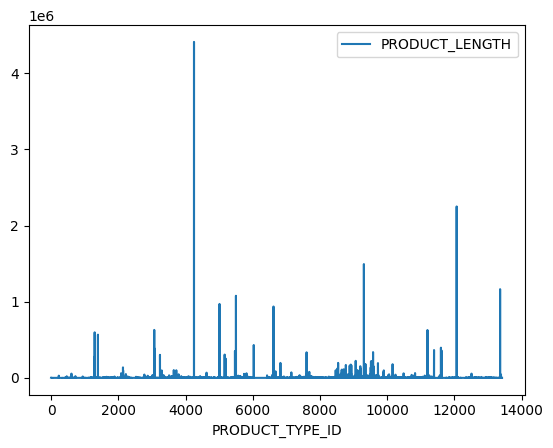

In [16]:
sns.lineplot(grp.agg({'PRODUCT_LENGTH':'mean'}))

<AxesSubplot: ylabel='PRODUCT_TYPE_ID'>

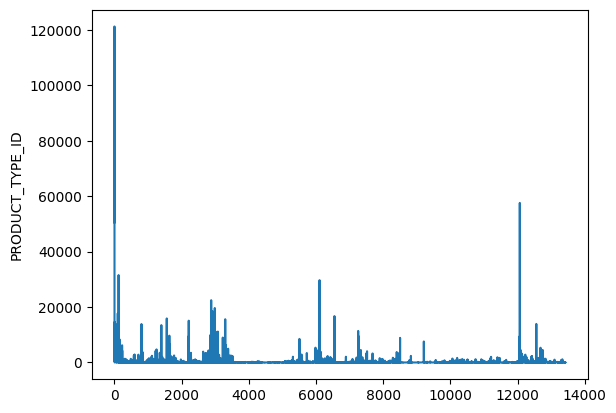

In [17]:
sns.lineplot(df['PRODUCT_TYPE_ID'].value_counts())

### Note - Assessing Data is an Iterative Process

### Data Quality Dimensions

- Completeness -> is data missing?
- Validity -> is data invalid -> negative height -> duplicate patient id
- Accuracy -> data is valid but not accurate -> weight -> 1kg
- Consistency -> both valid and accurate but written differently -> New Youk and NY

### Order of severity

Completeness <- Validity <- Accuracy <- Consistency

### Data Cleaning Order

1. Quality -> Completeness
2. Tidiness
3. Quality -> Validity
4. Quality -> Accuracy
5. Quality -> Consistency

#### Steps involved in Data cleaning
- Define
- Code
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [18]:
df_original=df.copy()

In [19]:
df[df['PRODUCT_ID']==2229306]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
751233,2229306,Alphabet Letter Patches A to Z | Iron On | Sew...,[EASY: Fast application & comes with instructi...,<ul></ul></br> <b>📦Package Includes:</b><li >x...,13259,340.0


In [20]:
df[df['PRODUCT_ID']==1955596]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
275,1955596,"Home Zone Living Wooden Crate Storage Set, Sta...",[Wood crate – Instantly add functionality and ...,NaN,10059,984.0


## PreProcessing
- change data into correct datatype

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [22]:
df=df.astype({'PRODUCT_ID':np.int32,'PRODUCT_TYPE_ID':'category'})

In [23]:
# # as BULLET_POINTS column contain missing values
# def evaluate(txt): 
#     if type(txt) ==str :
#         return txt.strip('[]').split(',')   
#     else:
#         return np.nan
# df['BULLET_POINTS']=df['BULLET_POINTS'].apply(evaluate)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype   
---  ------           -----   
 0   PRODUCT_ID       int32   
 1   TITLE            object  
 2   BULLET_POINTS    object  
 3   DESCRIPTION      object  
 4   PRODUCT_TYPE_ID  category
 5   PRODUCT_LENGTH   float64 
dtypes: category(1), float64(1), int32(1), object(3)
memory usage: 82.1+ MB


## common preprocessing

In [25]:
def remove_url(txt):
    txt = re.sub(r"\w+:\/\/.*?(?=\s)", '', txt)
    return txt

def remove_email(text):
    return re.sub('\S*@\S*\s?', '', text)

# Function for expanding most common contractions
def decontraction(phrase):
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"&", "and", phrase)
    return phrase

def remove_escape_sequences(text):
    text=text.replace(r"\n","")
    text=text.replace(r"\t","")
    text=text.replace(r"\r","")
    return text

def remove_emojize(txt):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', txt) # no emoji

def remove_special(txt):
    # remove trademark and registered 
    pattern2=re.compile("\\u00AE|\\u00a9|\\u2122")
    txt=pattern2.sub(r'',txt)
    return txt

def remove_html(txt):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',txt)

def remove_phoneno(txt):
    pattern=re.compile("((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))")
    return pattern.sub(r'',txt)

def rename_units(txt):
    d={'in.':'inch','inches':'inch','yards':'yard','feets':'feet','centimeter':'cm','cms':'cm','metre':'m','mtr':'m','meters':'m'}
    for char in d.keys():
        txt = txt.replace(char, d[char])
    return txt

def replace_seq(txt):
    d={':-':':',': -':':',';':',','||':'|'}
    for char in d.keys():
        txt = txt.replace(char, d[char])
    return txt

In [26]:
def preprocessing(txt):
    if type(txt)==str:
        txt=remove_url(txt)
        txt=remove_email(txt)
        txt=remove_phoneno(txt)
        txt=remove_html(txt)
        txt=remove_emojize(txt)
        txt=remove_special(txt)
        txt=remove_escape_sequences(txt)
        txt=decontraction(txt)
        txt=txt.lower()
        txt=rename_units(txt)
        txt=replace_seq(txt)
        return txt
    return np.nan

In [27]:
df['TITLE']=df['TITLE'].apply(preprocessing)

In [28]:
df['BULLET_POINTS']=df['BULLET_POINTS'].apply(preprocessing)

In [29]:
df['DESCRIPTION']=df['DESCRIPTION'].apply(preprocessing)

## extract size

In [30]:
def find_size(txt):
    if type(txt)==str and any(substring in txt for substring in ['size','inch','cm','mm','dimension','dimensions','lenght','width','height']):
        return True
    return False

In [31]:
print("percent of TITLE column having term related to size:", df['TITLE'].apply(find_size).sum()/df.shape[0])
print("percent of bullet_point column having term related to size:", df['BULLET_POINTS'].apply(find_size).sum()/df.shape[0])
print("percent of DESCRIPTION column having term related to size:", df['DESCRIPTION'].apply(find_size).sum()/df.shape[0])

percent of TITLE column having term related to size: 0.15954497003597817
percent of bullet_point column having term related to size: 0.2804336404264039
percent of DESCRIPTION column having term related to size: 0.21022110523279125


`regex`
- for int->'\d+'
- for float -> '\d+[.]?\d+'

In [32]:
# pattern 1 int"
pattern1=re.compile('\d+[.]?\d+" ?(?:inch|cm|mm|m)?')
# pattern 2 int x int 
pattern2=re.compile('\d+[.]?\d+ ?x ?\d+[.]?\d+')
# pattern3 int" x int" unit
pattern3=re.compile('\d+[.]?\d+"? ?x ?\d+[.]?\d+"? ?(?:inch|cm|mm|m)?')
# pattern4 int" x int" x int" unit
pattern4=re.compile('\d+[.]?\d+"? ?x ?\d+[.]?\d+"? ?x ?\d+[.]?\d+"? ?(?:inch|cm|mm|m)?')
# pattern5 int" x int" x int" unit
pattern5=re.compile('\d+[.]?\d+"? ?.? ?x ?\d+[.]?\d+"? ?.? ?x ?\d+[.]?\d+"? ?.? ?(?:inch|cm|mm|m)?')
# final pattern
pattern6=re.compile('\d+[.]?\d+"? ?.? ?[x*] ?\d+[.]?\d+"? ?.? ?[x*] ?\d+[.]?\d+"? ?.? ?(?:inch|cm|mm|m)?')

In [33]:
def test_pattern(txt):
    pattern=re.compile('\d+[.]?\d*"? ?(?:inch|cm|mm|m|feet)')
    return pattern.findall(txt)

In [34]:
txt=df.loc[1048396,'TITLE']
txt

'marilyn monroe sketch art print individual - 12" x 16"'

In [35]:
txt='artzfolio tulip flowers blackout curtain for door, window and room | eyelets and tie back | canvas fabric | width 4.5feet (54inch) height 5 feet (60 inch), set of 2 pcs'
test_pattern(txt)

['4.5feet', '54inch', '5 feet', '60 inch']

In [36]:
def extract_size(txt):
    if type(txt)!=str:
        return np.nan
    # pattern 1 int" x int" x int" unit
    pattern1=re.compile('\d+[.]?\d*"? ?.? ?[x*] ?\d+[.]?\d*"? ?.? ?[x*] ?\d+[.]?\d*"? ?.? ?(?:inch|cm|mm|m|feet)?')
    l1=pattern1.findall(txt)
    # pattern2 int" x int" unit
    pattern2=re.compile('\d+[.]?\d*"? ?.? ?[x*] ?\d+[.]?\d*"? ?.? ?(?:inch|cm|mm|m|feet)?')
    l2=pattern2.findall(txt)
    # pattern 3 int" unit
    pattern3=re.compile('\d+[.]?\d*" ?(?:inch|cm|mm|m|feet)?')
    l3=pattern3.findall(txt)
    # pattern 4 int" unit
    pattern4=re.compile('\d+[.]?\d*"? ?(?:inch|cm|mm|m|feet)')
    l4=pattern4.findall(txt)
    if(len(l1)>0):
        return l1
    if(len(l2)>0):
        return l2
    if(len(l3)>0):
        return l3
    if(len(l4)>0):
        return l4
    return np.nan


In [37]:
df['size_title']=df['TITLE'].apply(extract_size)

In [38]:
df['size_point']=df['BULLET_POINTS'].apply(extract_size)

In [39]:
df['size_description']=df['DESCRIPTION'].apply(extract_size)

In [40]:
def measure(val):
    category=set()
    value=[]
    for txt in val:
        if type(txt)==str:
            l=[]
            if 'xs' in txt or 'extra small' in txt:
                l.append(0)
            if 'small' in txt:
                l.append(1)
            if 'medium' in txt:
                l.append(2)
            if 'large' in txt or 'big' in txt:
                l.append(3)
            if 'xl' in txt or 'extra large' in txt:
                l.append(4)
            if len(l)==1 :
                category.add(l[0])
                value.append(l[0])
    if len(category)==1:
        return value[0]
    return np.nan

In [41]:
df['measure']=df[['TITLE','BULLET_POINTS','DESCRIPTION']].apply(measure,axis=1)

## size analysis

In [42]:
(~df[['size_title','size_point','size_description']].isnull()).any(axis=1).sum()/df.shape[0]

0.3599527581035321

## Feature Extraction from Text data

In [43]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation, digits
from collections import Counter
from wordcloud import WordCloud
from pprint import pprint 
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [44]:
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
stop = ENGLISH_STOP_WORDS.union(stop) # combine stop words from different sources
game_word = stop.union([])

In [45]:
# function for removing url from text
def remove_url(text):
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', 
                  '', text)
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())

def remove_email(text):
    return re.sub('\S*@\S*\s?', '', text)

def remove_brackets(text):
    text=re.sub(r"\[([A-Za-z0-9_]+)\]",'',text)
    text=re.sub(r"\(([A-Za-z0-9_]+)\)",'',text)
    text=re.sub(r"\{([A-Za-z0-9_]+)\}",'',text)
    return text

# Function for expanding most common contractions
def decontraction(phrase):
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"&", " and", phrase)
    phrase = re.sub(r"in.", " inch", phrase)
    return phrase

# remove punctuations
def remove_punct(txt):
    punc='!"#$%\'()*+-.<=>?@[\\]^_`{|}~'
    txt=txt.translate(str.maketrans('','',punc))
    return txt

# remove stopwords
def remove_stopwords(text):
    return [word for word in word_tokenize(text) if word.lower() not in stop]

def lemmatization(text):
    return [lemmatizer.lemmatize(word.lower(), pos='n') for word in text]

# remove only digits that are not joined to char (eg. 3d is not removed)
def remove_digits(text):
    return [word for word in text if not word.isdigit()]

def keep_alpha(text):
    return [word for word in text if word.isalpha()]

def remove_escape_sequences(text):
    text=text.replace(r"\n","")
    text=text.replace(r"\t","")
    text=text.replace(r"\r","")
    return text

def remove_emojize(txt):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', txt) # no emoji

def remove_special(txt):
    # remove trademark and registered 
    pattern2=re.compile("\\u00AE|\\u00a9|\\u2122")
    txt=pattern2.sub(r'',txt)
    return txt

def remove_html(txt):
    pattern=re.compile('<.*?>')
    return pattern.sub(r'',txt)

In [46]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet2022')
# nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


## TITLE col analysis

In [47]:
df[df['TITLE'].duplicated(keep=False)]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,size_title,size_point,size_description,measure
104,2522159,trendy world colorblock round neck casual boys...,"[care instruction : hand wash,wash care : norm...",this trendy world comfy and stylish sweater wi...,2697,196.850393,NaN,NaN,NaN,NaN
113,598129,barnaby rudge,NaN,NaN,110,600.000000,NaN,NaN,NaN,NaN
171,2155174,printed back cover for lenovo a7,"[slim fitting one-piece clip-on-case,silicon c...","designer back case for lenovo a7, provides pro...",12064,393.700787,NaN,NaN,NaN,NaN
392,2884314,clogs for men | cool | stylish | trendy | ultr...,[incredibly light and easy to wear heel strap ...,"a pair that elevates the sleek, fashion-athlet...",3243,1102.362204,NaN,NaN,NaN,NaN
418,1206546,dorman engine coolant thermostat housing,[direct replacement for a proper fit every tim...,dorman eng coolant thermostat hsg,7357,420.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2249532,477318,the german shepherd big book: all about the ge...,NaN,NaN,83,600.000000,NaN,NaN,NaN,3.0
2249551,2761482,"yaiewey long cardigans for women, womens light...",[winter coats for women trench coats for women...,pullover womens hoodies plus size hoodies for ...,2991,590.551180,NaN,NaN,NaN,NaN
2249600,1346248,morning song,NaN,NaN,7,551.180000,NaN,NaN,NaN,NaN
2249648,586218,god is hand upon my life,NaN,NaN,10507,700.000000,NaN,NaN,NaN,NaN


In [48]:
df[df['TITLE']=='Honey']

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,size_title,size_point,size_description,measure


`same product have diffrent product lenght and product_type_id`

In [49]:
df['TITLE'].str.len().describe()

count    2.249686e+06
mean     8.674493e+01
std      4.909457e+01
min      0.000000e+00
25%      5.000000e+01
50%      7.800000e+01
75%      1.170000e+02
max      5.030000e+02
Name: TITLE, dtype: float64

In [50]:
df_title=df[['PRODUCT_ID','TITLE']].copy()

In [51]:
df_title['TITLE']=df_title['TITLE'].str.lower()

- `error while assuming title to be string as it contain null value`

In [52]:
def title_bracket(s):
    s=str(s)
    # s=s.lower()
    pattern=re.compile("[\[({].*?[})\]]")
    l=pattern.findall(s)
    if(len(l)):
        ans=""
        for i in l:
            ans=ans+" "+i[1:-2]
        return ans
    return np.nan

In [53]:
df_title['bracket']=df_title['TITLE'].apply(title_bracket)

In [54]:
def title_transform(txt):
    txt=str(txt)
    # remove data of bracket
    pattern1=re.compile("[\[({].*?[})\]]")
    txt=pattern1.sub(r'',txt)
    # # remove trademark and registered 
    # pattern2=re.compile("\\u00AE|\\u00a9|\\u2122")
    # txt=pattern2.sub(r'',txt)
    # remove punctuations
    punc='!"#$%\'()*+-.<=>?@[\\]^_`{|}~'
    txt=txt.translate(str.maketrans('','',punc))
    # # replace & with and
    # txt = re.sub(r"&", " and", txt)
    # split string
    return re.split("[||,/]", txt)

In [55]:
df_title['TITLE'].fillna("missing title",inplace=True)

In [56]:
def title_transform(txt):
    txt=str(txt)
    # remove data of bracket
    pattern1=re.compile("[\[({].*?[})\]]")
    txt=pattern1.sub(r'',txt)
    # remove punctuations
    punc='!"#$%\'()*+-.<=>?@[\\]^_`{|}~'
    txt=txt.translate(str.maketrans('','',punc))
    # split string
    l=re.split("[||,/]", txt)
    value=[]
    for text in l:
        text=remove_stopwords(text)
        text=lemmatization(text)
        text=keep_alpha(text)
        value.extend(text)
    return value
    

In [57]:
from collections import Counter
from itertools import chain

# split words into lists
v = df_title['TITLE'].str.split().tolist()
# compute global word frequency
c = Counter(chain.from_iterable(v))
# filter, join, and re-assign
df_title['split_TITLE']=[' '.join([j for j in i if c[j] > 3]) for i in v]

In [58]:
df_title['split_TITLE']

0          artzfolio tulip flowers blackout curtain for d...
1                       marks and spencer girls' pyjama sets
2          priknik horn red electric air horn compressor ...
3          alishah women is cotton ankle length leggings ...
4          the united empire loyalists: a chronicle of th...
                                 ...                        
2249693    nike women is as w ny df swsh hn kh bra smoke ...
2249694    (3pcs) goose game cute cartoon enamel pins, fu...
2249695    kangroo sweep movement printed wooden wall clo...
2249696         electro voice | wall mount bracket for black
2249697    skyjacker component box for 4 inch lift incl. ...
Name: split_TITLE, Length: 2249698, dtype: object

In [59]:
s=df_title['split_TITLE'].apply(title_transform)
s

0          [artzfolio, tulip, flower, blackout, curtain, ...
1                         [mark, spencer, girl, pyjama, set]
2          [priknik, horn, red, electric, air, horn, comp...
3          [alishah, woman, cotton, ankle, length, leggin...
4          [united, empire, loyalist, chronicle, great, m...
                                 ...                        
2249693    [nike, woman, w, ny, df, swsh, hn, kh, bra, sm...
2249694    [goose, game, cute, cartoon, enamel, pin, funn...
2249695    [kangroo, sweep, movement, printed, wooden, wa...
2249696        [electro, voice, wall, mount, bracket, black]
2249697    [skyjacker, component, box, inch, lift, incl, ...
Name: split_TITLE, Length: 2249698, dtype: object

In [60]:
df_title['split_TITLE']=s
del s

In [61]:
df.shape[0]-df_title['bracket'].isnull().sum()

771025

## Bullet_points

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 10 columns):
 #   Column            Dtype   
---  ------            -----   
 0   PRODUCT_ID        int32   
 1   TITLE             object  
 2   BULLET_POINTS     object  
 3   DESCRIPTION       object  
 4   PRODUCT_TYPE_ID   category
 5   PRODUCT_LENGTH    float64 
 6   size_title        object  
 7   size_point        object  
 8   size_description  object  
 9   measure           float64 
dtypes: category(1), float64(2), int32(1), object(6)
memory usage: 150.8+ MB


In [63]:
df_points=df[['PRODUCT_ID','BULLET_POINTS']].copy()

In [64]:
# as BULLET_POINTS column contain missing values
def evaluate(txt): 
    if type(txt) ==str :
        return txt.strip('[]').split(',')   
    else:
        return np.nan
df_points['BULLET_POINTS']=df_points['BULLET_POINTS'].apply(evaluate)

In [65]:
df_points

,PRODUCT_ID,BULLET_POINTS
0,1925202,[luxurious and appealing: beautiful custom-mad...
1,2673191,"[harry potter hedwig pyjamas (6-16 yrs), 100% ..."
2,2765088,"[loud dual tone trumpet horn, compatible with..."
3,1594019,[made by 95%cotton and 5% lycra which gives yo...
4,283658,NaN
...,...,...
2249693,2422167,[material : polyester]
2249694,2766635,[ [inspiration] inspired by the untitled goose...
2249695,1987786,"[dial size: 12 inch in diameter, big, clear r..."
2249696,1165754,NaN


In [66]:
def point_transfrom(l):
    if type(l)==list:
        value=[]
        for txt in l:
            txt=txt.lower()
            txt=remove_emojize(txt)
            txt=remove_brackets(txt)
            txt=remove_html(txt)
            txt=remove_url(txt)
            txt=remove_email(txt)
            txt=decontraction(txt)
            txt=remove_special(txt)
            txt=remove_escape_sequences(txt)
            txt=remove_punct(txt)
            value.append(txt)
        return value
    return np.nan

In [67]:
def point_feature(l):
    if type(l)==list: 
        value=[]
        for i in l:
            value.append(i.split(':')[0])
        return value
    return np.nan

In [68]:
def point_size(l):
    if type(l)==list: 
        value=[]
        for txt in l:
            txt=txt.lower()
            if any(substring in txt for substring in ['in.','inch','cm','cms','m']):
                value.append(txt)
                continue
            val=txt.split(':')[0]
            if any(substring in val for substring in ['size','dimension','dimensions','package']):
                value.append(txt)
        if len(value)>0:
            return value
    return np.nan

In [69]:
df_points['BULLET_POINTS'].apply(point_feature)

0          [luxurious and appealing, material,  cotton ca...
1          [harry potter hedwig pyjamas (6-16 yrs), 100% ...
2          [loud dual tone trumpet horn,  compatible with...
3          [made by 95%cotton and 5% lycra which gives yo...
4                                                        NaN
                                 ...                        
2249693                                          [material ]
2249694    [ [inspiration] inspired by the untitled goose...
2249695    [dial size, big,  clear representation of the ...
2249696                                                  NaN
2249697    [component box for pn[c7360pk], 4 inch lift, i...
Name: BULLET_POINTS, Length: 2249698, dtype: object

In [70]:
df_points['transform']=df_points['BULLET_POINTS'].apply(point_transfrom)

In [71]:
df_points['BULLET_POINTS'].apply(point_size) # split has some errors

0          [luxurious and appealing: beautiful custom-mad...
1          [harry potter hedwig pyjamas (6-16 yrs), 100% ...
2          [loud dual tone trumpet horn,  compatible with...
3          [made by 95%cotton and 5% lycra which gives yo...
4                                                        NaN
                                 ...                        
2249693                               [material : polyester]
2249694    [ [inspiration] inspired by the untitled goose...
2249695    [dial size: 12 inch in diameter,  clear repres...
2249696                                                  NaN
2249697         [component box for pn[c7360pk], 4 inch lift]
Name: BULLET_POINTS, Length: 2249698, dtype: object

In [72]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [73]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [74]:
def check(x,d):
    for i in x:
        if i in d:
            return True
    return False

def oheplatform(s,d):
    bool_dict = {}
    for k in d.keys():
        bool_dict[k]= s.apply(lambda x: check(x,d[k]))
    return pd.DataFrame(bool_dict)
                    

## preprocessed Data

In [75]:
df

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH,size_title,size_point,size_description,measure
0,1925202,artzfolio tulip flowers blackout curtain for d...,[luxurious and appealing: beautiful custom-mad...,NaN,1650,2125.980000,"[4.5feet, 54inch, 5 feet, 60 inch]","[4.5feet, 54inch, 5 feet, 60 inch]",NaN,3.0
1,2673191,marks and spencer girls' pyjama sets t86_2561c...,"[harry potter hedwig pyjamas (6-16 yrs),100% c...",NaN,2755,393.700000,NaN,NaN,NaN,NaN
2,2765088,priknik horn red electric air horn compressor ...,"[loud dual tone trumpet horn, compatible with ...","specifications: color: red, material: aluminiu...",7537,748.031495,NaN,NaN,NaN,NaN
3,1594019,alishah women is cotton ankle length leggings ...,[made by 95%cotton and 5% lycra which gives yo...,aishah women is lycra cotton ankel leggings. b...,2996,787.401574,NaN,NaN,"[30 inch, 32 inch, 34 inch, 38 inch]",NaN
4,283658,the united empire loyalists: a chronicle of th...,NaN,NaN,6112,598.424000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2249693,2422167,nike women is as w ny df swsh hn kh bra (cz761...,material : polyester,NaN,3009,1181.100000,NaN,NaN,NaN,NaN
2249694,2766635,"(3pcs) goose game cute cartoon enamel pins, fu...",[ [inspiration] inspired by the untitled goose...,[brand]: xvieonr [product name]: fashion cute...,3413,125.984252,NaN,NaN,NaN,NaN
2249695,1987786,kangroo sweep movement printed wooden wall clo...,"[dial size: 12 inch in diameter,big, clear rep...",wall clocks are very attractive in looks and e...,1574,1200.000000,[12 x 12 i],[12 inch],NaN,3.0
2249696,1165754,electro voice ekx-brkt15 | wall mount bracket ...,NaN,NaN,592,2900.000000,NaN,NaN,NaN,NaN
